<a href="https://colab.research.google.com/github/nicodavia83/Diplodatos-Mentoria/blob/main/Mentor%C3%ADa_TP2_AYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Selección de cripto activos para una cartera de inversión

![picture](https://drive.google.com/uc?export=view&id=1ihM3JEKP-XPaoX9b5bwymu_IF4ntTlz-)

# Trabajo Práctico 2 -  Análisis y Curación

## Introducción


A lo largo de este práctico continuaremos con la exploración del dataset iniciada en el práctio anterior, donde notamos algunas características propias de las series temporales. 
Además, vimos que no se trata de series estacionarias y en nuestro caso no apreciamos patrones de estacionalidad para la serie de tiempo de los precios.

En la siguiente notebook, se presentan las actividades relacionadas a Análisis y Curación. Buscamos identificar e implementar los pasos necesarios para la limpieza de la base de datos, así como también analizar cruces de datos con mayor profundidad. Para esto, los invito a chequear la siguiente [lista](https://dimewiki.worldbank.org/Checklist:_Data_Cleaning), donde se muestran una serie de puntos a tener en cuenta a la hora de tratar nuestros datos.

# 📖 ¡Actividades! 


Recuerden que la ciencia de datos es un proceso no lineal y continuo, es decir, si los datos requieren de mayor procesamiento para satisfacer las necesidades de algoritmos de machine learning, vamos a volver a la etapa inicial para, por ejemplo, crear nuevas features, tomar decisiones diferentes sobre valores faltantes o valores atípicos (outliers), descartar features, entre otras. ¡Manos a la obra!

Recomendación: Traten de crear funciones de manera de automatizar la mayor cantidad de pasos posibles. 

## Parte I 

- En el práctico anterior trabajamos con un conjunto de datos preprocesados, los invito a inspeccionar el siguiente conjunto de datos (link). Como pueden ver, el sistema que define las fechas no es el mismo que trabajamos durante el práctico anterior, en este caso las fechas se encuetran en tiempo Unix. Investiguen este sistema y convierta las fechas a tipo datetime. 
Para mayor información pueden ver:
    
    - [Convertir Epoch a Datetime en Python](https://www.delftstack.com/es/howto/python/python-convert-epoch-to-datetime/)


- Indaguen sobre la existencia de valores faltantes. Diferencien entre datos perdidos e inexistentes. Seleccionen un activo y visualicen utilizando la librería Missingno ¿Si uno de los precios falta, también faltan los datos en las demás columnas? ¿Cuál creen que sería la mejor forma de tratarlos? ¿Por qué? Analicen formas de imputarlos, por ejemplo, 

    - reemplazar el faltante con el valor de la media/mediana,
    - utilizar regresión. 
    - métodos backward/forward fill. 
    - Splines, etc. 
    
Para mayor información puede ver el siguiente link [Imputación](https://rpubs.com/wilsonsr/804544)

**Para discutir:** ¿Cuáles podrían ser las razones de la falta de datos, si es que esto ocurre?


- ¿Hay índices repetidos? Resuelvan. 


- Para aprovechar en mayor medida los datos disponibles, analicen dividir los datos en dos posibles conjuntos de acuerdo a la disponibilidad de información según fechas.


- ¿Podría mejorarse la forma en la que está presentada la información? Recuerden que serán necesarios todos los precios de los activos para el cálculo de features. 


- Seleccionen un activo (y alguna de las columnas referidos a precios) y confeccionen un diagrama de dispersión entre el mismo y su valor retardado un período. Repita el mismo procedimiento con sus valores retardado 2, 3 y 4 períodos. 


- Grafiquen e interpreten las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF), para el precio del activo elegido en el punto anterior. El siguiente [link](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/) puede ser útil para introducirlos en el tema.


## Parte II 

En esta instancia trabajaremos con algunos features extras que iremos generando a partir de los precios disponibles. Para ello los invito a investigar [talib](http://mrjbq7.github.io/ta-lib/doc_index.html), una de las librerías de python para análisis técnico.

- Agreguen la serie de tasas de rendimientos de cada activo. 


- Calculen las medias móviles de los precios tomando n periodos hacia atrás (n a elección).  


- ¿Conocen algunos indicadores técnicos? Entre los más conocidos podemos mencionar: [RSI](https://admiralmarkets.com/es/education/articles/forex-indicators/como-sacar-beneficio-del-indicador-de-trading-rsi), [MADC](https://admiralmarkets.com/es/education/articles/forex-indicators/macd), [ADX](https://economipedia.com/definiciones/indicador-adx-average-directional-index.html), etc... Pueden construirlos o calcularlos a partir de la librería.


- Si por ejemplo, una característica tiene una varianza de un orden de magnitud mayor que la de las otras características, podría dominar la función objetivo y hacer que el estimador no pueda aprender de otras características correctamente como se esperaba. Para lograr esto se debe llevar a cabo un escalado o normalizado de datos. ¿Cuál es la diferencia?

## Opcional

- Para alguno/s de los activos, detecten las correlaciones entre los features generados utilizando la función Heatmap().




**¡Recuerde!** 

Nunca Modificar los Datos Crudos u Originales Al finalizar la limpieza, deberán guardar el dataset resultante, para asegurarse de no modificar los datos originales.

# Fecha de entrega

- __Versión preliminar: 17/6__ 

# Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis desarrollado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver. Dicho informe puede ser un notebook, a condición de que en el mismo se efectúe un análisis escrito suficientemente detallado de los resultados. 

# Resolución

##Inicialización


### Importar librerías

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
import datetime
import time
import os

### Instalar TA - Lib

In [ ]:
# download TA-Lib 

!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz 
!tar xvzf ta-lib-0.4.0-src.tar.gz
os.chdir('ta-lib')
!./configure --prefix=/usr
!make
!make install
os.chdir('../')
!pip install TA-Lib


--2022-07-14 00:32:43--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-07-14 00:32:43--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://versaweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-07-14 00:32:43--  http://versaweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving versaweb.dl.s

In [ ]:
import talib as ta


### Cargar datasets

In [ ]:
 pairs = ["AAVEUSDT", "ADAUSDT", "AXSUSDT", "BCHUSDT", "BNBUSDT", "BTCUSDT", "COMPUSDT", "DASHUSDT", 
          "DOGEUSDT", "DOTUSDT", "EOSUSDT", "ETCUSDT", "ETHUSDT", "LINKUSDT", "LTCUSDT", "LUNAUSDT", "NEOUSDT", "XMRUSDT", "XRPUSDT"]
interesting_pairs = ["BTCUSDT", "ETHUSDT", "ADAUSDT"]

def add_pair_to_dictionary(dictionary, pair):
  dictionary[pair] = pd.read_csv(f"https://raw.githubusercontent.com/martinezarraigadamaria/MentoriaDiploDatos2022/main/row_data/{pair}.csv")

def get_dataframes():
  dataframes = dict()
  
  for pair in pairs:
    add_pair_to_dictionary(dataframes, pair)
    
  return dataframes

raw_dataframes = get_dataframes() # No agregar columnas en estos dataframes. La idea es mantener los dataframes originales.
dataframes = raw_dataframes.copy() # Cualquier modificación de algún dataframe, realizarlo en estos.
sample_dataframe = dataframes["BTCUSDT"]

In [ ]:
print(len(pairs))

19


## Funciones
Definimos un conjunto de funciones comunes para todos los ejercicios.

### Funciones compuestas

In [ ]:
def do(func, *args):
  for pair in pairs:
    func(pair, *args)  

def do_interesting(func, *args):
  for pair in interesting_pairs:
    func(pair, *args)

### Funciones para graficar

In [ ]:
def plot_multiple_temporal_serie(dataframe, variables, title, xlabel, ylabel, legends=None, together=False):
  if(not together):
    plt.figure(figsize=(20, 6))

  for variable in variables:
    seaborn.lineplot(x=dataframe.index, y=variable, data=dataframe)

  plt.suptitle(f"{title}")
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

  if(legends != None):
    plt.legend(title='Serie', loc='upper left', labels=legends)

def plot_temporal_serie(dataframe, variable, together=False, title=None, with_trendline=False, add=None):
  if(not together):
    plt.figure(figsize=(20, 6))
  
  if(title==None):
    title = f"Serie temporal"
  
  seaborn.lineplot(x=dataframe.index, y=variable, data=dataframe).set(
      xlabel="Fecha", 
      ylabel=variable,
      title=title
  )
  if(with_trendline):
    seaborn.regplot(x=dataframe.index.map(pd.Timestamp.toordinal), y=variable, data=dataframe, ci=None)
  
  if(add!=None):
    seaborn.lineplot(x=dataframe.index, y=add, data=dataframe)

##Parte 1

### Ejercicio 1
En el práctico anterior trabajamos con un conjunto de datos preprocesados, los invito a inspeccionar el siguiente conjunto de datos (link). Como pueden ver, el sistema que define las fechas no es el mismo que trabajamos durante el práctico anterior, en este caso las fechas se encuetran en tiempo Unix. Investiguen este sistema y convierta las fechas a tipo datetime. Para mayor información pueden ver:
    - [Convertir Epoch a Datetime en Python](https://www.delftstack.com/es/howto/python/python-convert-epoch-to-datetime/)



Consultamos las columnas del dataframe crudo 

In [ ]:
sample_dataframe.info

<bound method DataFrame.info of               unix      open      high       low     close        volume
0     1.546312e+12   3690.00   3720.00   3685.78   3703.56   3346.849726
1     1.546326e+12   3703.63   3732.00   3696.14   3713.07   3200.719832
2     1.546340e+12   3713.07   3756.94   3684.21   3698.53   3324.094679
3     1.546355e+12   3698.28   3701.68   3642.00   3659.41   3089.291395
4     1.546369e+12   3659.56   3730.01   3659.56   3711.20   4906.805931
...            ...       ...       ...       ...       ...           ...
7302  1.651705e+12  39681.80  39798.09  39536.66  39773.33   6031.068080
7303  1.651720e+12  39773.32  39845.51  39534.02  39549.28   3940.138350
7304  1.651734e+12  39549.28  39629.85  39407.17  39513.66   4510.255890
7305  1.651748e+12  39513.67  39576.00  38090.29  38209.00  15772.014950
7306  1.651763e+12  38209.01       NaN       NaN       NaN           NaN

[7307 rows x 6 columns]>

In [ ]:
sample_dataframe.describe()

,unix,open,high,low,close,volume
count,7.307000e+03,7307.000000,7290.000000,7290.000000,7290.000000,7290.000000
mean,1.599072e+12,23903.708277,24174.014037,23612.164641,23909.639897,9866.541392
std,3.044625e+10,19071.107745,19292.662707,18830.839000,19072.784492,7658.750195
min,1.546312e+12,3386.940000,3401.210000,3349.920000,3386.960000,1336.680768
25%,1.572714e+12,8553.135000,8628.445000,8464.230000,8552.405000,5134.050396
50%,1.599088e+12,11416.790000,11499.620000,11333.770000,11419.965000,7860.573648
75%,1.625432e+12,41535.250000,41941.480000,41111.250000,41533.205000,12044.356257
max,1.651763e+12,68382.700000,69000.000000,67627.140000,68382.690000,133403.364344


In [ ]:
sample_dataframe.dtypes

unix      float64
open      float64
high      float64
low       float64
close     float64
volume    float64
dtype: object

Definimos una función para convertir una columna numérica en Datetime

In [ ]:
def to_datetime(pair, column):
  dataframes[pair][column] = [datetime.datetime.fromtimestamp(x) for x in dataframes[pair][column]/1000] # Fix unixtime. Tiene 3 ceros de más.
  dataframes[pair].rename(columns = {'unix':'date'}, inplace = True)



Agregamos la columna `date` a partir de la columna `unix`

In [ ]:
do(to_datetime, "unix")

Consultamos la nueva columna

In [ ]:
sample_dataframe.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume           float64
dtype: object

In [ ]:
sample_dataframe[:3]

,date,open,high,low,close,volume
0,2019-01-01 03:00:00,3690.00,3720.00,3685.78,3703.56,3346.849726
1,2019-01-01 07:00:00,3703.63,3732.00,3696.14,3713.07,3200.719832
2,2019-01-01 11:00:00,3713.07,3756.94,3684.21,3698.53,3324.094679


### Ejercicio 2 
Indaguen sobre la existencia de valores faltantes. Diferencien entre datos perdidos e inexistentes. Seleccionen un activo y visualicen utilizando la librería Missingno ¿Si uno de los precios falta, también faltan los datos en las demás columnas? ¿Cuál creen que sería la mejor forma de tratarlos? ¿Por qué? Analicen formas de imputarlos, por ejemplo, 

  - reemplazar el faltante con el valor de la media/mediana,
  - utilizar regresión. 
  - métodos backward/forward fill. 
  - Splines, etc. 
    
Para mayor información puede ver el siguiente link [Imputación](https://rpubs.com/wilsonsr/804544)

**Para discutir:** ¿Cuáles podrían ser las razones de la falta de datos, si es que esto ocurre?

- Los datos faltantes se dividen en:

1) Datos perdidos.
2) Datos inexistentes.

- Un dato perdido es un dato que se sabe que existe pero dada una recolección fallida o incompleta, no se conoce su valor.
- Un dato inexistente es un dato faltante (por lo cual es ruido), pero a la vez no lo es pues no existe. Esto es, no puede ser recolectado.

Python no reconoce la diferencia, por lo cual uno debe ser muy cauteloso cuando trabaja con datos de ambas clases. Al leer un archivo con espacios en blanco, automáticamente asigna a ese dato un **NaN** numérico con capacidad de ser imputado.
Sin embargo, en Python existe el objeto **None**, el cual es un single null datatype. El dato **NaN** puede ser usado como valor numérico en operaciones matemáticas, mientras que **None** no, o al menos no debería.

**NaN** es un valor numérico, definido en IEEE 754 floating-point standard.

**None** es un internal Python type (NoneType), y es más parecido al no existente o vacío que al numerically invalid en este contexto.

Para lidiar con valores perdidos es necesario usar la intuición para averiguar por qué falta el valor. Una de las preguntas más importantes que puede hacerse para ayudar a resolver esto es la siguiente:

**¿Falta este valor porque no se registró, o porque no existe?**

Si falta un valor porque no existe, no tiene sentido intentar adivinar cuál podría ser. Estos son los valores que probablemente desee mantener como NaN, o codificados con un valor constante muy lejos del rango real de la variable.

Por otro lado, si falta un valor porque no se registró, puede intentar adivinar cuál podría haber sido ese valor basándose en los otros valores de la columna y de la fila (modelar para imputar), aunque también podría existir el caso en el que no tengamos en cuenta ese valor.

**Modelos de pérdida de datos**

- MCAR (MISSING COMPLETELY AT RANDOM): La pérdida no está relacionada con las características observadas y no observadas.
- MAR (MISSING AT RANDOM): La pérdida está relacionada solo con las características observadas.
- NMAR (NOT MISSING AT RANDOM): La pérdida está relacionada con características no observadas y quizás con características observadas.



- Seleccionamos como criptoactivo al par BTCUSDT.

In [ ]:
#Visualizamos el encabezado de datos 

sample_dataframe.head()

,date,open,high,low,close,volume
0,2019-01-01 03:00:00,3690.00,3720.00,3685.78,3703.56,3346.849726
1,2019-01-01 07:00:00,3703.63,3732.00,3696.14,3713.07,3200.719832
2,2019-01-01 11:00:00,3713.07,3756.94,3684.21,3698.53,3324.094679
3,2019-01-01 15:00:00,3698.28,3701.68,3642.00,3659.41,3089.291395
4,2019-01-01 19:00:00,3659.56,3730.01,3659.56,3711.20,4906.805931


In [ ]:
#Visualizamos cómo están compuestos los datos

sample_dataframe.shape

(7307, 6)

In [ ]:
#Hacemos un breve repaso de los estadísticos

sample_dataframe.describe()

,open,high,low,close,volume
count,7307.000000,7290.000000,7290.000000,7290.000000,7290.000000
mean,23903.708277,24174.014037,23612.164641,23909.639897,9866.541392
std,19071.107745,19292.662707,18830.839000,19072.784492,7658.750195
min,3386.940000,3401.210000,3349.920000,3386.960000,1336.680768
25%,8553.135000,8628.445000,8464.230000,8552.405000,5134.050396
50%,11416.790000,11499.620000,11333.770000,11419.965000,7860.573648
75%,41535.250000,41941.480000,41111.250000,41533.205000,12044.356257
max,68382.700000,69000.000000,67627.140000,68382.690000,133403.364344


In [ ]:
#Visualiamos la información del dataframe

sample_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7307 entries, 0 to 7306
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    7307 non-null   datetime64[ns]
 1   open    7307 non-null   float64       
 2   high    7290 non-null   float64       
 3   low     7290 non-null   float64       
 4   close   7290 non-null   float64       
 5   volume  7290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 342.6 KB


In [ ]:
#Buscamos valores igual a 0 en algunas de nuestras columnas

cols = sample_dataframe[sample_dataframe == 0].count(axis=0)

cols[cols > 0]

print(cols)

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [ ]:
#Hacemos un recuento de los valores nulos existentes

missing_values_sum = sample_dataframe.isnull().sum()

missing_values_sum

date       0
open       0
high      17
low       17
close     17
volume    17
dtype: int64

In [ ]:
# Total de valores faltantes
total_cells = np.product(sample_dataframe.shape)
total_missing = missing_values_sum.sum()

# Porcentaje de datos faltantes.
(total_missing / total_cells) * 100

0.15510241321107615

- Solo hay un 0.155% de datos faltantes para el activo elegido. La cantidad de datos faltantes es la misma para las 4 variables menos "Open" que cuenta con todos los datos.


- Usando la librería **Missingno** podemos hacer un análisis gráfico de los datos faltantes.

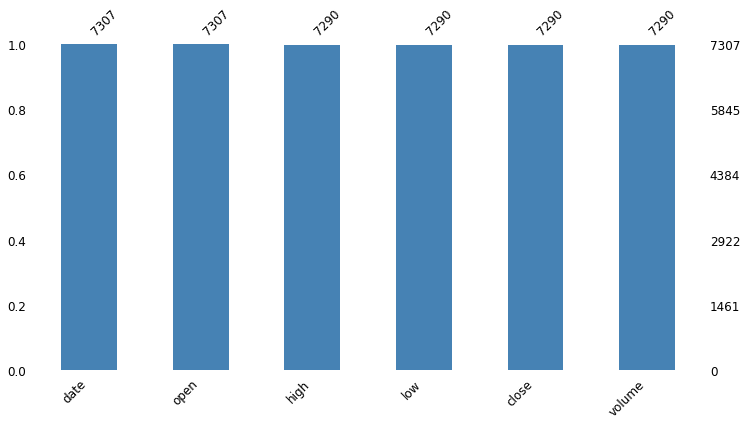

In [ ]:
import missingno as msno

msno.bar(sample_dataframe, figsize=(12, 6), fontsize=12, color='steelblue');

- A pesar de que son muy pocos datos faltantes, podemos observar que las columnas "HIGH", "LOW", "CLOSE" y "VOLUME", tienen 17 datos faltantes cada una, pero no es para todas las columnas ya que como mencionábamos anteriormente, la columna "OPEN" cuenta con todos los datos.

- También podemos visualizar las posiciones en el dataset de los datos faltantes usando matrix(). 
El gráfico aparece en blanco siempre que falten valores.

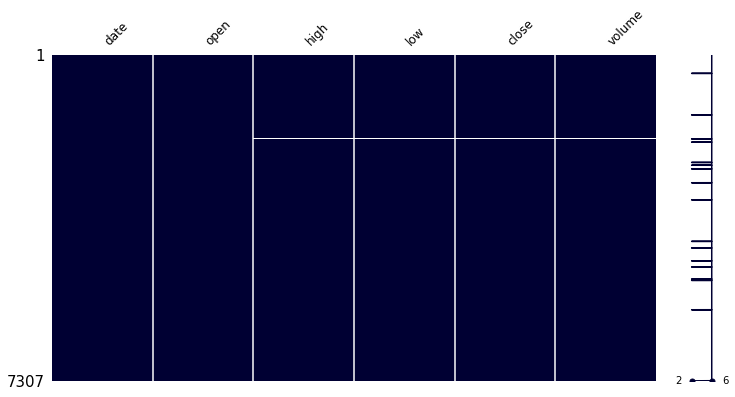

In [ ]:
msno.matrix(sample_dataframe, figsize=(12, 6), fontsize=12, color=[0, 0, 0.2]);

- Podríamos decir que en este caso la mejor forma de tratar los datos faltantes sería descartarlos, ya que al ser un número tan chico de valores no tiene una gran incidencia; pero siendo este un caso de series temporales con datos faltantes de manera sistemática, creemos que para un mejor análisis posterior lo que corresponde es que realicemos la imputación de dichos valores.

In [ ]:
#Imputamos los valores faltantes por la media

# from sklearn.impute import SimpleImputer

# simple = SimpleImputer().fit(sample_dataframe)
# mean = simple.transform(sample_dataframe)
"""
# figure size
#plt.rcParams['figure.figsize']=(15,7)
# On the customer column of our data, impute the missing values with the LOCF
#sample_dataframe_2 = sample_dataframe.fillna(method ='bfill')
# plot our time series with imputed values
#plt.plot(dataset['Customers_locf'], color='blue')
#Plot tittle
#plt.title('Last Observation Carried Forward')
# show the plot
#plt.show()
"""


"\n# figure size\n#plt.rcParams['figure.figsize']=(15,7)\n# On the customer column of our data, impute the missing values with the LOCF\n#sample_dataframe_2 = sample_dataframe.fillna(method ='bfill')\n# plot our time series with imputed values\n#plt.plot(dataset['Customers_locf'], color='blue')\n#Plot tittle\n#plt.title('Last Observation Carried Forward')\n# show the plot\n#plt.show()\n"

In [ ]:
sample_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7307 entries, 0 to 7306
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    7307 non-null   datetime64[ns]
 1   open    7307 non-null   float64       
 2   high    7290 non-null   float64       
 3   low     7290 non-null   float64       
 4   close   7290 non-null   float64       
 5   volume  7290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 342.6 KB


In [ ]:
def fill_na(pair, method_name):
  dataframes[pair] = dataframes[pair].fillna(method=method_name)

do(fill_na,"ffill")


In [ ]:
def print_missing_status(pair):
  print(f"Variables con valores faltantes (true/false) del par {pair}: \n {dataframes[pair].isnull().any()}\n")

do(print_missing_status)

Variables con valores faltantes (true/false) del par AAVEUSDT: 
 date      False
open      False
high      False
low       False
close     False
volume    False
dtype: bool

Variables con valores faltantes (true/false) del par ADAUSDT: 
 date      False
open      False
high      False
low       False
close     False
volume    False
dtype: bool

Variables con valores faltantes (true/false) del par AXSUSDT: 
 date      False
open      False
high      False
low       False
close     False
volume    False
dtype: bool

Variables con valores faltantes (true/false) del par BCHUSDT: 
 date      False
open      False
high      False
low       False
close     False
volume    False
dtype: bool

Variables con valores faltantes (true/false) del par BNBUSDT: 
 date      False
open      False
high      False
low       False
close     False
volume    False
dtype: bool

Variables con valores faltantes (true/false) del par BTCUSDT: 
 date      False
open      False
high      False
low       False
close 

- Con relación a la razón por la cual pueden existir datos faltantes, nos podemos remitir a los modelos previamente mencionados para responder esta pregunta.

Completamente al azar: el hecho que falte una observación no está relacionado con el o los valores faltantes ni con los valores existentes. Otra manera de pensarlo es que cualquier valor tiene la misma probabilidad de faltar que cualquier otro. Por ejemplo, fallas ocasionales de equipos que impiden hacer una medición, olvido ocasional en registrar un dato, el encargado de hacer la medición se enfermó o pérdidas de muestras porque se rompieron los tubos. Omitir del análisis a los individuos con datos faltantes no alteraría la validez pero podría disminuir la potencia del estudio. Estimar a priori posibles pérdidas por este mecanismo debiera formar parte del protocolo en el cálculo del tamaño muestral.

Al azar: una o varias características registradas pueden explicar la distribución de los datos faltantes. Por ejemplo: el nivel de respuestas faltantes en una encuesta está relacionado con el nivel socio-económico, el número de pacientes con un ECG preoperatorio está relacionado con la edad de los pacientes, o un centro en un estudio multicéntrico no mide una variable particular porque no cuenta con los medios para ello. El nombre es confundente por lo que algunos prefieren “falta ignorable o manejable” estadísticamente.

No al azar: los datos faltantes probablemente dependen o están relacionados con datos no observados. Por ejemplo: falta de respuesta en un cuestionario, pérdida durante el seguimiento. El sesgo o los sesgos que pueden introducirse son evidentes e invalidan en mayor o menor medida los resultados.

### Ejercicio 3
¿Hay índices repetidos? Resuelvan.

Agrupamos por date, aplicamos la agregación COUNT y filtramos por los grupos que superen 1.

In [ ]:
def print_groups_greater_than_1(pair, column):
  print(f"Grupos por columna '{column}' que superan a 1 del par {pair}")
  
  grouped = dataframes[pair].groupby(column).agg( 
    date = (column,'first'),   
    count = (column,'count') 
  )
  print(grouped[grouped["count"]>1])
  print("\n")

In [ ]:
do(print_groups_greater_than_1, "date")

Grupos por columna 'date' que superan a 1 del par AAVEUSDT
Empty DataFrame
Columns: [date, count]
Index: []


Grupos por columna 'date' que superan a 1 del par ADAUSDT
Empty DataFrame
Columns: [date, count]
Index: []


Grupos por columna 'date' que superan a 1 del par AXSUSDT
Empty DataFrame
Columns: [date, count]
Index: []


Grupos por columna 'date' que superan a 1 del par BCHUSDT
Empty DataFrame
Columns: [date, count]
Index: []


Grupos por columna 'date' que superan a 1 del par BNBUSDT
Empty DataFrame
Columns: [date, count]
Index: []


Grupos por columna 'date' que superan a 1 del par BTCUSDT
Empty DataFrame
Columns: [date, count]
Index: []


Grupos por columna 'date' que superan a 1 del par COMPUSDT
Empty DataFrame
Columns: [date, count]
Index: []


Grupos por columna 'date' que superan a 1 del par DASHUSDT
Empty DataFrame
Columns: [date, count]
Index: []


Grupos por columna 'date' que superan a 1 del par DOGEUSDT
Empty DataFrame
Columns: [date, count]
Index: []


Grupos por colu

No existen fechas repetidas, por lo que procedemos a indexar el dataframe por la columna `date` 

In [ ]:
def set_index(pair, column):
  dataframes[pair].set_index(column, inplace=True, verify_integrity = True)

do(set_index, "date")


In [ ]:
sample_dataframe.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume           float64
dtype: object

### Ejercicio 5
¿Podría mejorarse la forma en la que está presentada la información? Recuerden que serán necesarios todos los precios de los activos para el cálculo de features.

Si, es posible combinar todos los dataframes en un mismo dataframe, utilizando el indice creado por fecha como criterio de merge. Sin embargo, esta función de consolidar todos los dataframes en uno solo se hará luego de calcular los features por simplicidad.

In [ ]:
def get_consolidated_dataframe_by_column(column):
  interesting_columns = dataframes["BTCUSDT"].columns.values.tolist()
  pairs_suffixes = ["_" + sub for sub in pairs]

  dataframe_all = pd.DataFrame(dataframes["BTCUSDT"].index) # Podría obtenerse el dataframe con mayor rango utilizando una función.

  i = 0
  for pair in pairs:
    dataframe_all = dataframe_all.merge(dataframes[pair], on=column, how="left", suffixes=["",pairs_suffixes[i]])
    i += 1

  # Hack para nombrar correctamente las columnas del primer par
  map_for_rename_columns_first_pair = dict()
  first_pair_suffix = pairs_suffixes[0]
  for column in interesting_columns:
    map_for_rename_columns_first_pair[column] = column + first_pair_suffix

  dataframe_all.rename(columns = map_for_rename_columns_first_pair, inplace = True)

  return dataframe_all


### Ejercicio 4 
Para aprovechar en mayor medida los datos disponibles, analicen dividir los datos en dos posibles conjuntos de acuerdo a la disponibilidad de información según fechas.

Se considera que la mejor manera de dividir los datos es por un lado dejar todos los activos que pertenecen al mayor rango de fechas, para así tener un set completo con el que trabajar, y en un segundo dataframe los demás activos para poder ser utilizados como complementarios en caso de hacer un analisis sobre todo el universo de datos.

In [ ]:
def get_two_consolidated_dataframe_by_column(column):
  
  oldDate = datetime.datetime(2019,1, 1, 3, 0, 0, 0) # Al obtener el dataframe con mayor rango se podria obtener la fecha mas antigua

  dataframe_base = pd.DataFrame(dataframes["BTCUSDT"].index) # Podría obtenerse el dataframe con mayor rango utilizando una función.
  dataframe_extra = pd.DataFrame(dataframes["LINKUSDT"].index) # Podría obtenerse el dataframe con el segundo mayor rango utilizando una función.

  i = 0
  for pair in pairs:
    tmpdf = dataframes[pair].copy()
    tmpdf.columns = pair + "_" + tmpdf.columns.values

    if (pd.DataFrame(dataframes[pair].index)[:1]['date'].min() == oldDate): # Si la primer fecha es igual a la mas antigua se asigna al df full
      
      dataframe_base = dataframe_base.merge(tmpdf, on=column, how="left")
    else:
      dataframe_extra = dataframe_extra.merge(tmpdf, on=column, how="left")
    i += 1


  return dataframe_base, dataframe_extra

### Ejercicio 6 
Seleccionen un activo (y alguna de las columnas referidos a precios) y confeccionen un diagrama de dispersión entre el mismo y su valor retardado un período. Repita el mismo procedimiento con sus valores retardado 2, 3 y 4 períodos.

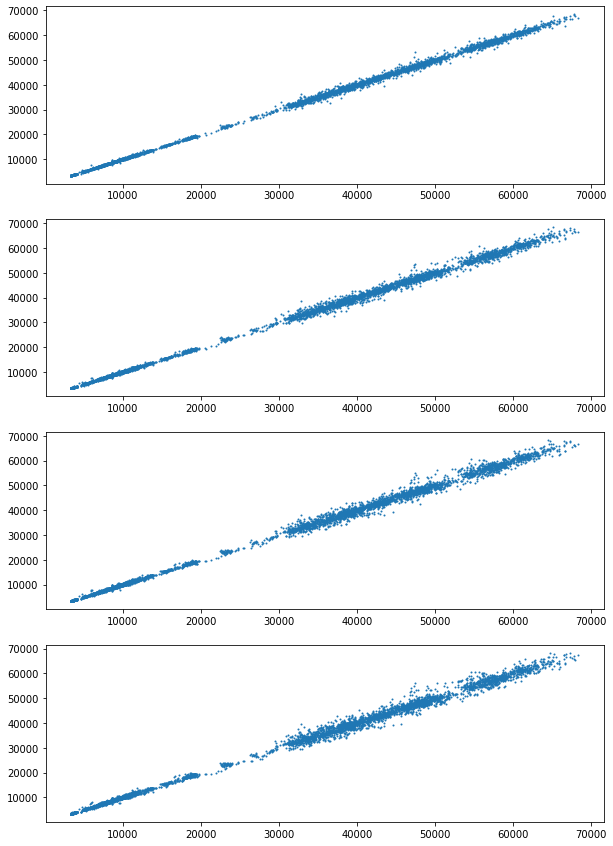

In [ ]:
plt.figure(figsize=(10, 15))

plt.subplot(411)
plt.scatter(x=sample_dataframe.close,y=sample_dataframe.close.shift(1),s = 1)
plt.subplot(412)
plt.scatter(x=sample_dataframe.close,y=sample_dataframe.close.shift(2),s = 1)
plt.subplot(413)
plt.scatter(x=sample_dataframe.close,y=sample_dataframe.close.shift(3),s = 1)
plt.subplot(414)
plt.scatter(x=sample_dataframe.close,y=sample_dataframe.close.shift(4),s = 1)

### Ejercicio 7
Grafiquen e interpreten las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF), para el precio del activo elegido en el punto anterior. El siguiente [link](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/) puede ser útil para introducirlos en el tema.



In [ ]:
sample_dataframe[:10]

,date,open,high,low,close,volume
0,2019-01-01 03:00:00,3690.00,3720.00,3685.78,3703.56,3346.849726
1,2019-01-01 07:00:00,3703.63,3732.00,3696.14,3713.07,3200.719832
2,2019-01-01 11:00:00,3713.07,3756.94,3684.21,3698.53,3324.094679
3,2019-01-01 15:00:00,3698.28,3701.68,3642.00,3659.41,3089.291395
4,2019-01-01 19:00:00,3659.56,3730.01,3659.56,3711.20,4906.805931
5,2019-01-01 23:00:00,3712.85,3810.16,3706.43,3783.28,7404.855783
6,2019-01-02 03:00:00,3783.28,3796.22,3750.45,3758.53,2851.463847
7,2019-01-02 07:00:00,3758.53,3800.00,3755.40,3788.00,6156.138405
8,2019-01-02 11:00:00,3788.22,3839.63,3777.82,3811.24,7491.230337
9,2019-01-02 15:00:00,3812.17,3865.72,3785.75,3828.87,7425.687505


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


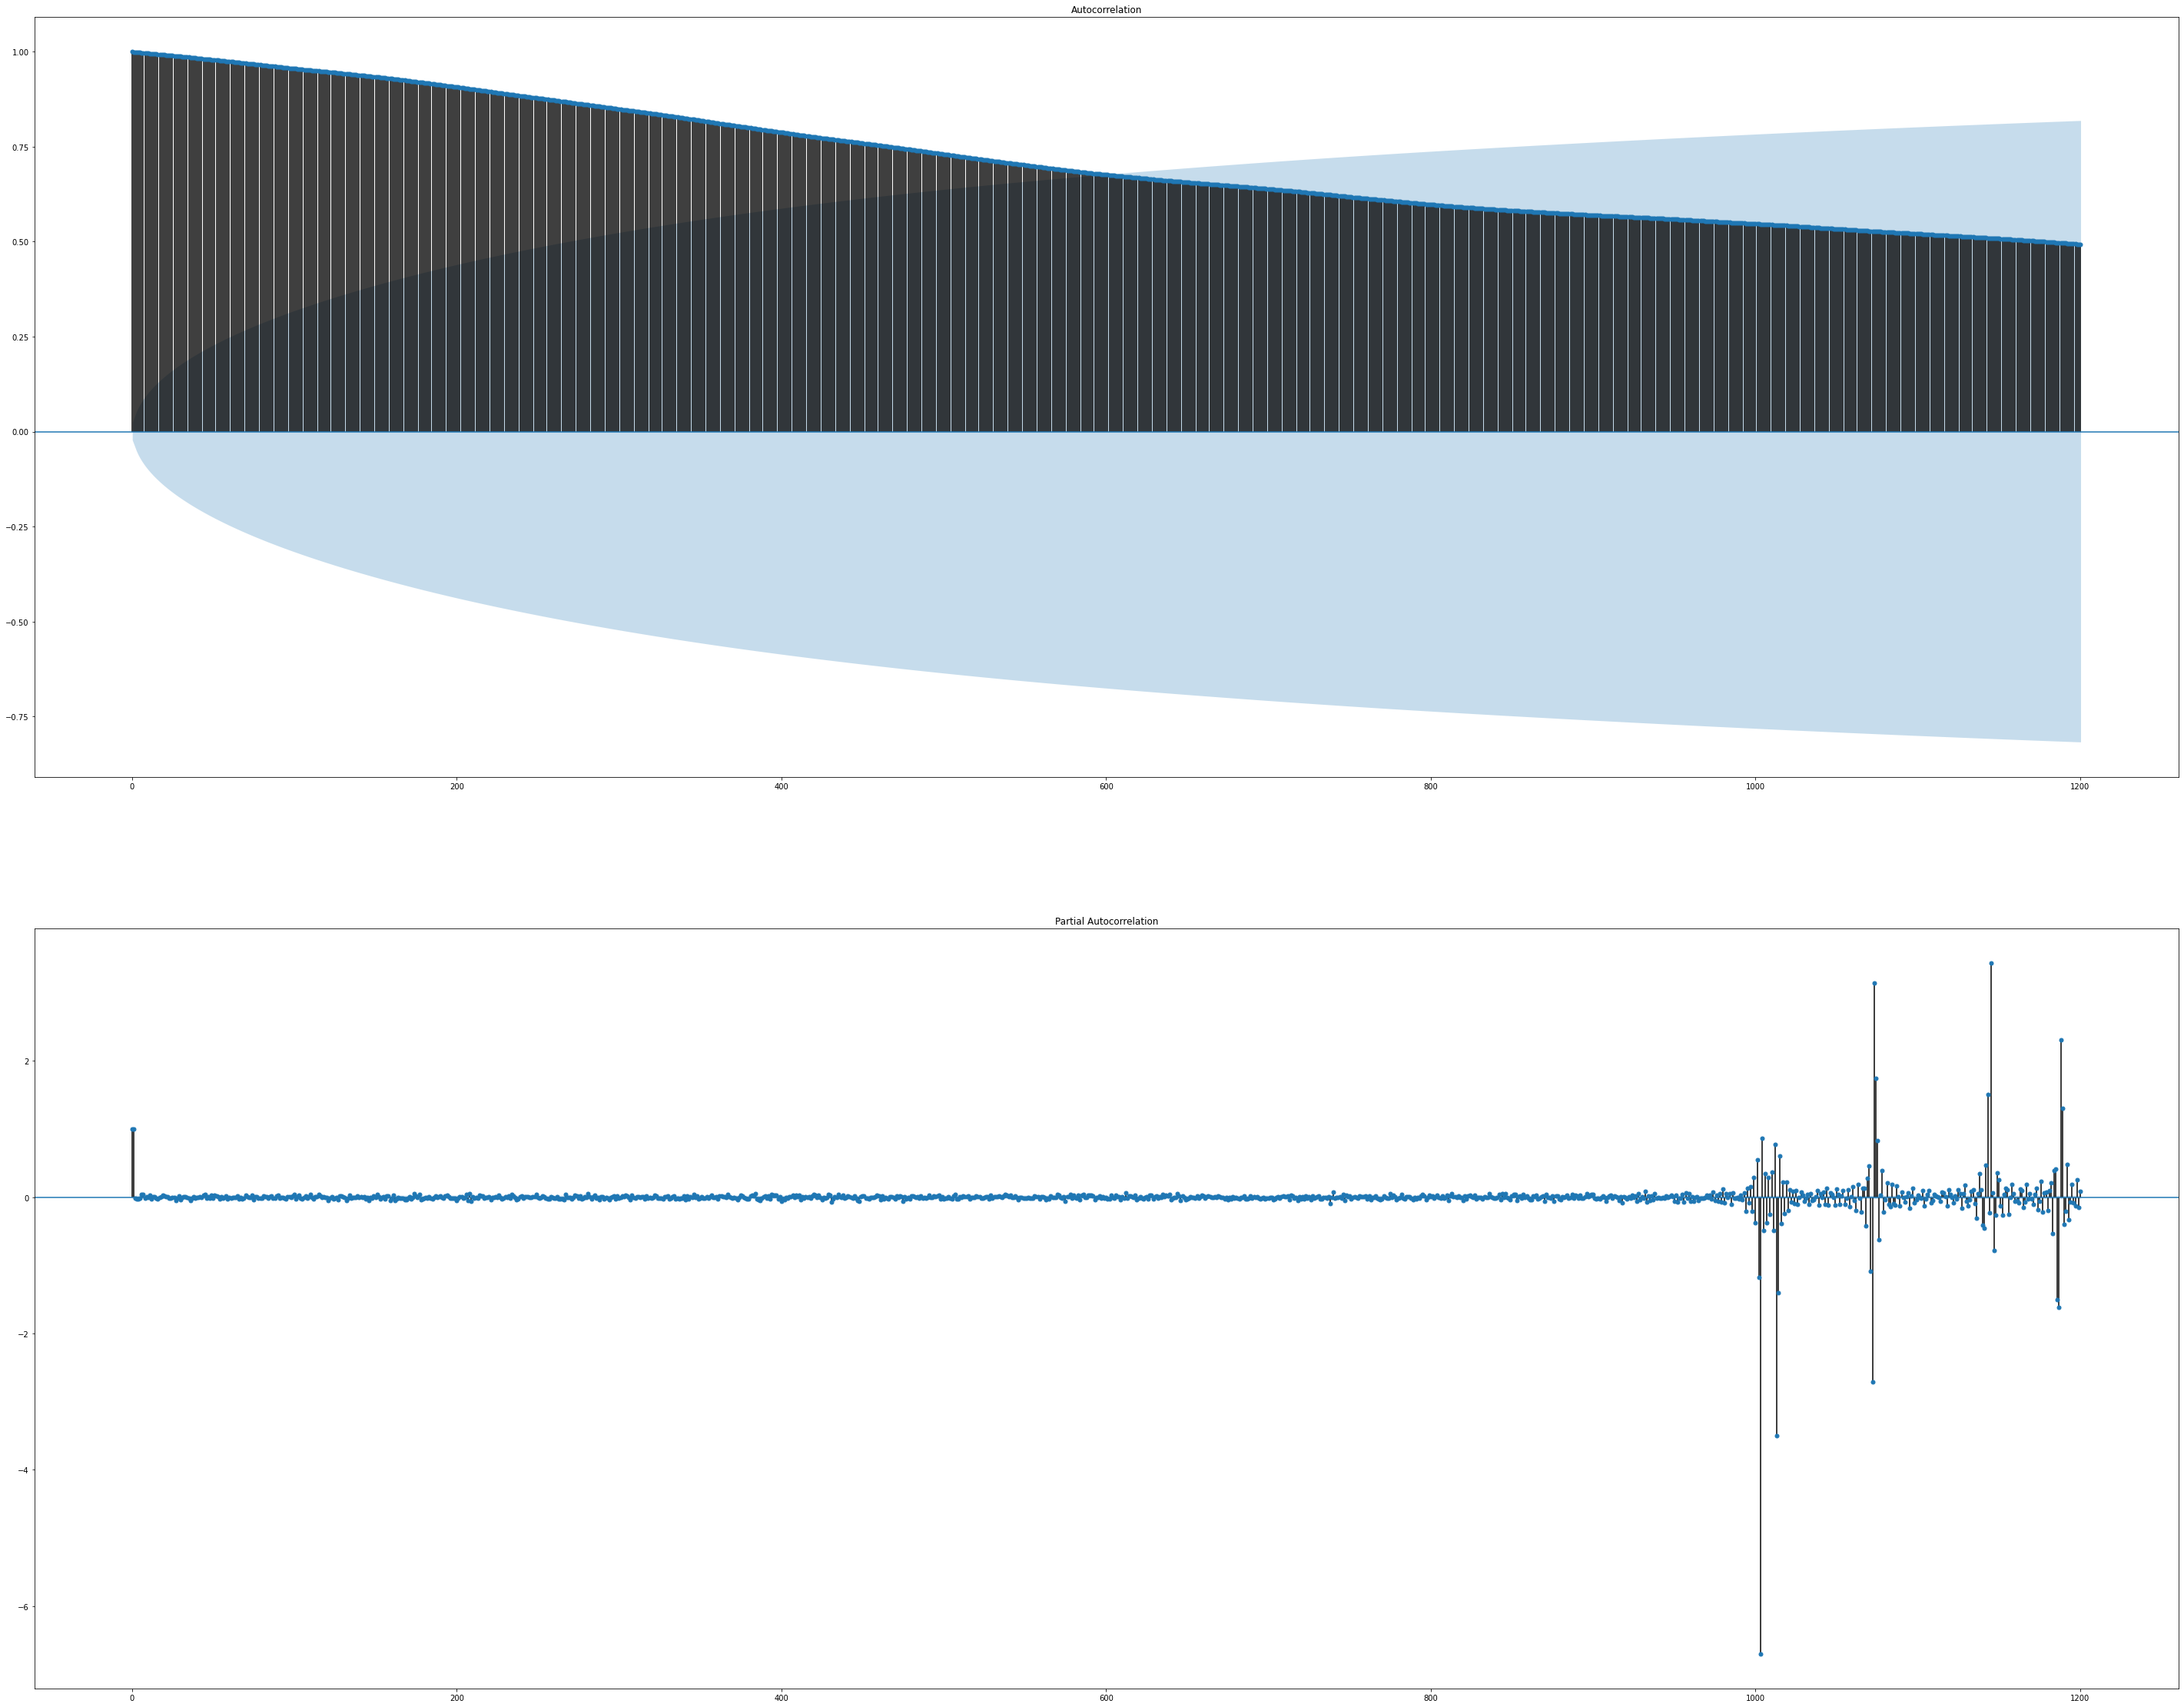

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(50, 40))
plt.subplot(211)
plot_acf(sample_dataframe['close'].dropna(), lags = 1200, ax=plt.gca())
plt.subplot(212)
plot_pacf(sample_dataframe['close'].dropna(), lags = 1200, ax=plt.gca())
plt.show()

Del analisis de autocorrelacion podemos observar que solo los ultimos 100 dias (600 periodos) tienen una influencia en el precio por encima de la probabilidad estadistica. Del analisis de autocorrelacion parcial, por otro lado, pareciera haber actividad relevante mas alla de los 167 dias (1000 periodos) aprox. No estamos seguros de la implicancia de esto, por lo que buscaremos profundizar este analisis. 

##Parte 2
En esta instancia trabajaremos con algunos features extras que iremos generando a partir de los precios disponibles. Para ello los invito a investigar [talib](http://mrjbq7.github.io/ta-lib/doc_index.html), una de las librerías de python para análisis técnico.

Definimos una función para agregar features, aplicando una función f(x) a cada columna del dataframe. 

In [ ]:
def add_feature(dataframe, fn_name, fn, *args):
  columns = dataframe.columns.values.tolist()
  for column in columns:
    add_feature_for_column(dataframe, column, fn_name, fn,*args )

def add_feature_for_column(dataframe, column, fn_name, fn, *args):
  dataframe[f"{fn_name}_{column}"] = fn(dataframe[column], *args)

###Ejercicio 1
Agreguen la serie de tasas de rendimientos de cada activo. 


In [ ]:
def add_exchanges_rate(pair):
  dataframe = dataframes[pair]
  exchanges_rate = dataframe.pct_change()
  columns = dataframe.columns.values.tolist()
  new_columns = ["exchange_rate_" + column for column in columns]
  exchanges_rate.columns = new_columns
  dataframes[pair] = dataframe.merge(exchanges_rate,  left_index=True, right_index=True)

do(add_exchanges_rate)

In [ ]:
dataframes["BTCUSDT"].describe()

,open,high,low,close,volume,exchange_rate_open,exchange_rate_high,exchange_rate_low,exchange_rate_close,exchange_rate_volume
count,7307.000000,7307.000000,7307.000000,7307.000000,7307.000000,7306.000000,7306.000000,7306.000000,7306.000000,7306.000000
mean,23903.708277,24173.060783,23611.329245,23908.688040,9863.474214,0.000434,0.000424,0.000472,0.000433,0.136337
std,19071.107745,19290.740219,18828.959101,19070.798203,7652.363357,0.015062,0.014256,0.017208,0.015024,0.670477
min,3386.940000,3401.210000,3349.920000,3386.960000,1336.680768,-0.197389,-0.137867,-0.320372,-0.197389,-0.811492
25%,8553.135000,8632.480000,8467.000000,8555.500000,5136.398120,-0.005161,-0.005090,-0.005157,-0.005149,-0.273593
50%,11416.790000,11499.240000,11332.480000,11419.000000,7858.954610,0.000304,-0.000432,0.001220,0.000283,-0.014260
75%,41535.250000,41946.320000,41115.780000,41535.245000,12042.531413,0.005924,0.005235,0.006603,0.005884,0.343273
max,68382.700000,69000.000000,67627.140000,68382.690000,133403.364344,0.127248,0.191123,0.235812,0.127248,9.185994


###Ejercicio 2
Calculen las medias móviles de los precios tomando n periodos hacia atrás (n a elección).  

In [ ]:
def add_moving_average(pair, variable, n):
  dataframe = dataframes[pair]
  dataframe[f"moving_average_{variable}"] = dataframe[variable].rolling(n).mean()

do(add_moving_average, "close", 6*7*4)

In [ ]:
dataframes["BTCUSDT"].describe()

,open,high,low,close,volume,exchange_rate_open,exchange_rate_high,exchange_rate_low,exchange_rate_close,exchange_rate_volume,moving_average_close
count,7307.000000,7307.000000,7307.000000,7307.000000,7307.000000,7306.000000,7306.000000,7306.000000,7306.000000,7306.000000,7140.000000
mean,23903.708277,24173.060783,23611.329245,23908.688040,9863.474214,0.000434,0.000424,0.000472,0.000433,0.136337,23963.030499
std,19071.107745,19290.740219,18828.959101,19070.798203,7652.363357,0.015062,0.014256,0.017208,0.015024,0.670477,18923.844216
min,3386.940000,3401.210000,3349.920000,3386.960000,1336.680768,-0.197389,-0.137867,-0.320372,-0.197389,-0.811492,3519.346548
25%,8553.135000,8632.480000,8467.000000,8555.500000,5136.398120,-0.005161,-0.005090,-0.005157,-0.005149,-0.273593,8593.616473
50%,11416.790000,11499.240000,11332.480000,11419.000000,7858.954610,0.000304,-0.000432,0.001220,0.000283,-0.014260,11120.672202
75%,41535.250000,41946.320000,41115.780000,41535.245000,12042.531413,0.005924,0.005235,0.006603,0.005884,0.343273,41566.221473
max,68382.700000,69000.000000,67627.140000,68382.690000,133403.364344,0.127248,0.191123,0.235812,0.127248,9.185994,62839.279940


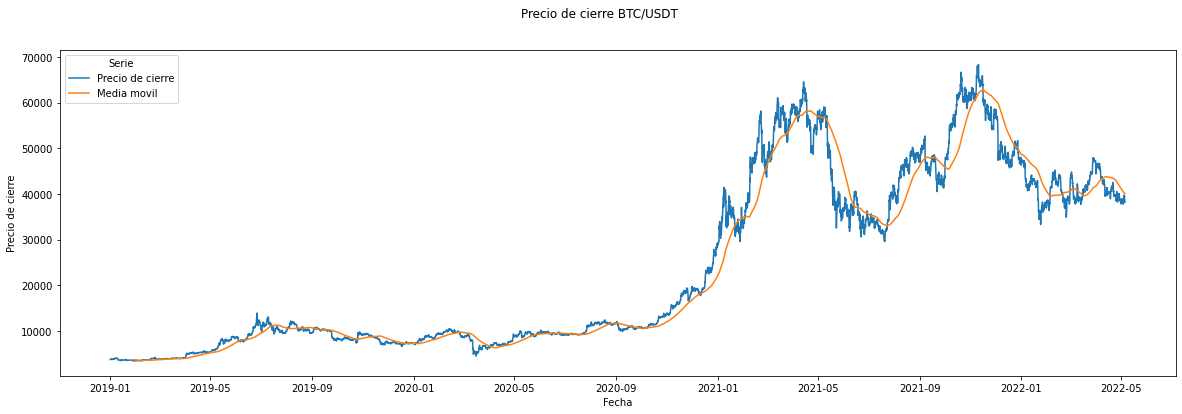

In [ ]:
plot_multiple_temporal_serie(
               dataframes["BTCUSDT"], 
               ["close", "moving_average_close"], 
               "Precio de cierre BTC/USDT", 
               "Fecha", 
               "Precio de cierre",
               ["Precio de cierre", "Media movil"])

###Ejercicio 3
¿Conocen algunos indicadores técnicos? Entre los más conocidos podemos mencionar: [RSI](https://admiralmarkets.com/es/education/articles/forex-indicators/como-sacar-beneficio-del-indicador-de-trading-rsi), [MADC](https://admiralmarkets.com/es/education/articles/forex-indicators/macd), [ADX](https://economipedia.com/definiciones/indicador-adx-average-directional-index.html), etc... Pueden construirlos o calcularlos a partir de la librería.

Agregamos el RSI

In [ ]:
def rsi(dataframe, variable, periods = 14, ema = True):
    variable_delta = dataframe[variable].diff()

    up = variable_delta.clip(lower=0)
    down = -1 * variable_delta.clip(upper=0)
    
    if ema == True:
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()
        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi

def add_rsi(pair, variable):
  dataframe = dataframes[pair]
  dataframe[f"rsi"] = rsi(dataframe, variable)

do(add_rsi, "close")

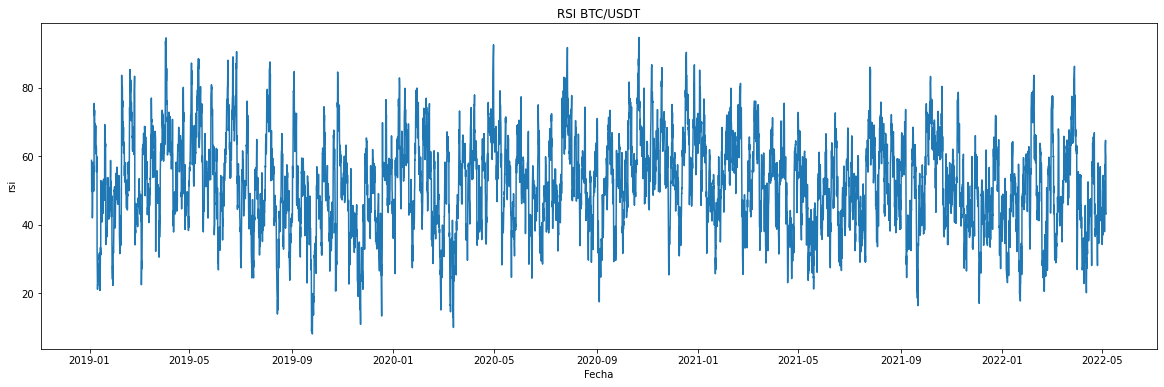

In [ ]:
plot_temporal_serie(dataframes["BTCUSDT"], "rsi", title="RSI BTC/USDT")

Agregamos ADX

In [ ]:
def add_adx(pair):
  dataframe = dataframes[pair]
  dataframe["adx"] = ta.ADX(dataframe["high"], dataframe["low"], dataframe["close"], timeperiod=14)

do(add_adx)

dataframes["BTCUSDT"].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7307 entries, 2019-01-01 03:00:00 to 2022-05-05 15:00:00
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   open                  7307 non-null   float64
 1   high                  7307 non-null   float64
 2   low                   7307 non-null   float64
 3   close                 7307 non-null   float64
 4   volume                7307 non-null   float64
 5   exchange_rate_open    7306 non-null   float64
 6   exchange_rate_high    7306 non-null   float64
 7   exchange_rate_low     7306 non-null   float64
 8   exchange_rate_close   7306 non-null   float64
 9   exchange_rate_volume  7306 non-null   float64
 10  moving_average_close  7140 non-null   float64
 11  rsi                   7293 non-null   float64
 12  adx                   7280 non-null   float64
dtypes: float64(13)
memory usage: 799.2 KB


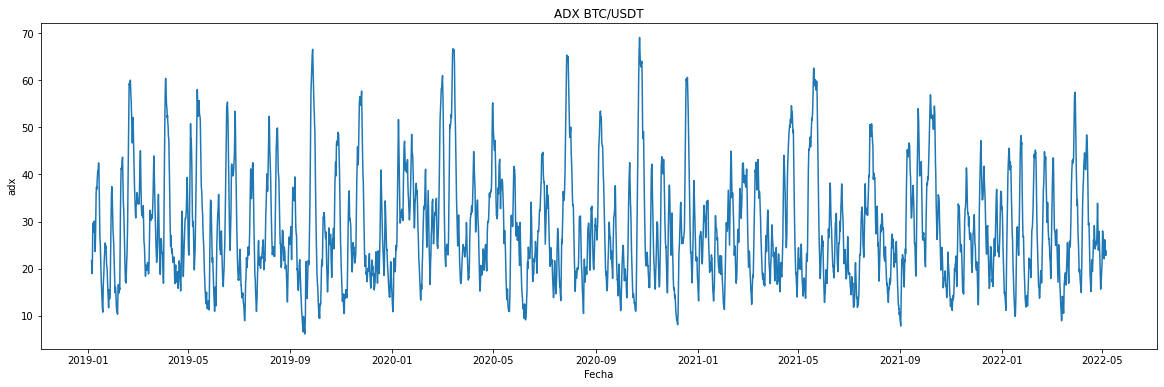

In [ ]:
plot_temporal_serie(dataframes["BTCUSDT"], "adx", title="ADX BTC/USDT")

Agregamos MACD

In [ ]:
def add_macd(pair):
  dataframe = dataframes[pair]
  dataframe["macd"], dataframe["macd_signal"], dataframe["macd_hist"] = ta.MACD(dataframe["close"], fastperiod=12, slowperiod=26, signalperiod=9)

do(add_macd)

dataframes["BTCUSDT"].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7307 entries, 2019-01-01 03:00:00 to 2022-05-05 15:00:00
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   open                  7307 non-null   float64
 1   high                  7307 non-null   float64
 2   low                   7307 non-null   float64
 3   close                 7307 non-null   float64
 4   volume                7307 non-null   float64
 5   exchange_rate_open    7306 non-null   float64
 6   exchange_rate_high    7306 non-null   float64
 7   exchange_rate_low     7306 non-null   float64
 8   exchange_rate_close   7306 non-null   float64
 9   exchange_rate_volume  7306 non-null   float64
 10  moving_average_close  7140 non-null   float64
 11  rsi                   7293 non-null   float64
 12  adx                   7280 non-null   float64
 13  macd                  7274 non-null   float64
 14  macd_signal           7274 non-null 

In [ ]:
dataframes["BTCUSDT"].describe()

,open,high,low,close,volume,exchange_rate_open,exchange_rate_high,exchange_rate_low,exchange_rate_close,exchange_rate_volume,moving_average_close,rsi,adx,macd,macd_signal,macd_hist
count,7307.000000,7307.000000,7307.000000,7307.000000,7307.000000,7306.000000,7306.000000,7306.000000,7306.000000,7306.000000,7140.000000,7293.000000,7280.000000,7274.000000,7274.000000,7274.000000
mean,23903.708277,24173.060783,23611.329245,23908.688040,9863.474214,0.000434,0.000424,0.000472,0.000433,0.136337,23963.030499,52.016890,28.406295,33.591353,33.539472,0.051881
std,19071.107745,19290.740219,18828.959101,19070.798203,7652.363357,0.015062,0.014256,0.017208,0.015024,0.670477,18923.844216,13.602823,11.646612,529.897349,499.526188,158.147157
min,3386.940000,3401.210000,3349.920000,3386.960000,1336.680768,-0.197389,-0.137867,-0.320372,-0.197389,-0.811492,3519.346548,8.042033,6.140586,-2704.890816,-2450.243248,-1259.117378
25%,8553.135000,8632.480000,8467.000000,8555.500000,5136.398120,-0.005161,-0.005090,-0.005157,-0.005149,-0.273593,8593.616473,42.528575,19.852827,-99.059475,-95.763031,-37.433192
50%,11416.790000,11499.240000,11332.480000,11419.000000,7858.954610,0.000304,-0.000432,0.001220,0.000283,-0.014260,11120.672202,52.012128,25.873055,16.068554,16.244262,-0.142178
75%,41535.250000,41946.320000,41115.780000,41535.245000,12042.531413,0.005924,0.005235,0.006603,0.005884,0.343273,41566.221473,61.384786,35.149976,170.260626,164.370586,40.917947
max,68382.700000,69000.000000,67627.140000,68382.690000,133403.364344,0.127248,0.191123,0.235812,0.127248,9.185994,62839.279940,94.755320,69.055810,2445.465541,2131.141359,790.052702


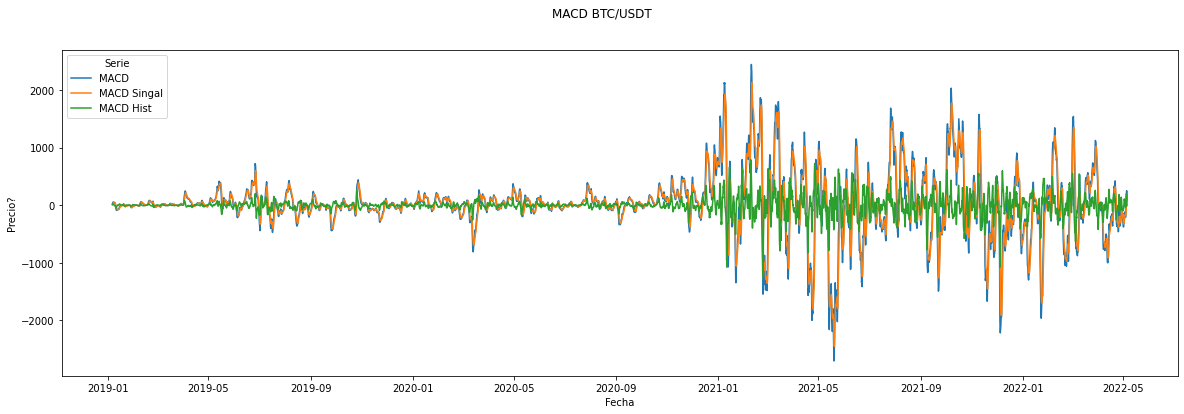

In [ ]:
plot_multiple_temporal_serie(
               dataframes["BTCUSDT"], 
               ["macd", "macd_signal", "macd_hist"], 
               "MACD BTC/USDT", 
               "Fecha", 
               "Precio?",
               ["MACD", "MACD Singal", "MACD Hist"])

Finalmente y retomando lo mencionado en el punto 5 de la parte 1, consolidamos los dataframes en un mismo dataframe

In [ ]:
dataframe_all = get_consolidated_dataframe_by_column("date")

dataframe_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7307 entries, 0 to 7306
Columns: 305 entries, date to macd_hist_XRPUSDT
dtypes: datetime64[ns](1), float64(304)
memory usage: 17.1 MB


###Ejercicio 4
Si por ejemplo, una característica tiene una varianza de un orden de magnitud mayor que la de las otras características, podría dominar la función objetivo y hacer que el estimador no pueda aprender de otras características correctamente como se esperaba. Para lograr esto se debe llevar a cabo un escalado o normalizado de datos. ¿Cuál es la diferencia?

- Escalado VS Normalización

Una de las razones por la cual es fácil confundirse entre escalado y normalización es que se suelen intercambiar ambos conceptos y para hacerlo más confuso, son similares.
En ambos casos se transforma el valor de las variables numéricas para que las observaciones transformadas sean útiles en propiedades específicas.
La diferencia radica en que:

 -  En el **escalado** se cambia el rango de los datos.
 - Mientras que en la **normalización** se cambia la forma de distribución de los datos.



 1) Escalado

Significa que vamos a transformar los datos para que se ajusten a una escala específica como puede ser 0-100, o 0-1. 
Se van a escalar los datos cuando se usen métodos basados en medidas de aproximación de las observaciones como puede ser el método SVM o KNN. Con estos algoritmos a un cambio en "1" en cualquier atributo numérico se le da la misma importancia.



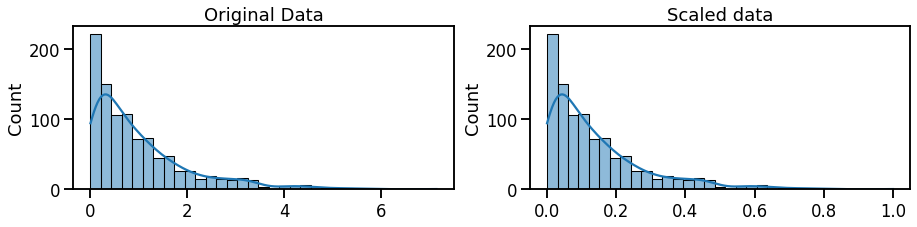

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
import plotly.express as px
from mlxtend.preprocessing import minmax_scaling

import numpy as np
import pandas as pd

# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

2) Normalización

Cuando hablamos de normalización hablamos de una transformación más radical. El objetivo de la normalización es cambiar las observaciones para que puedan ser descriptas como una distribución normal.

En general, se normalizan los datos cuando vamos a usar técnicas estadísticas o de Machine Learning donde se asume que los datos van a tener una distribución normal.

El método que vamos a utilizar para normalizar se llama Box-Cox Transformation.



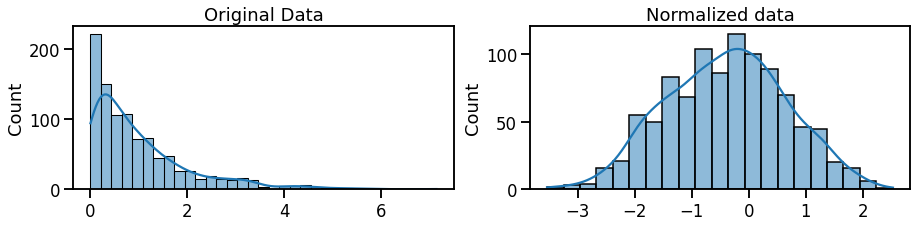

In [ ]:
from scipy import stats

# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

### Ejercicio 5 (opcional)
Para alguno/s de los activos, detecten las correlaciones entre los features generados utilizando la función Heatmap().